In [ ]:
import json
import pandas as pd

voc_dir = '/Users/stellazwj/Library/CloudStorage/OneDrive-EmoryUniversity/4. Fourth Year/QTM 385 Data Analytics/Hasbro/Toys_and_Games_5.json'

json_path = f'{voc_dir}/Toys_and_Games_5.json'

df = pd.read_json(json_path, lines=True)

#with open(json_path, 'r') as json_file:
#    for line in json_file:
#        data = json.loads(line)
#        print("JSON Content:")
#        print(data)

#df.to_csv(f'{voc_dir}toys_and_games.csv', index = False)

FileNotFoundError: ignored

In [ ]:
df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image'],
      dtype='object')

In [ ]:
df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,3,True,"10 6, 2013",A2LSCFZM2FBZK7,0486427706,{'Format:': ' Paperback'},Ginger,The stained glass pages are pretty cool. And i...,Nice book,1381017600,NaN
1,5,9,True,"08 9, 2013",A3IXP5VS847GE5,0486427706,{'Format:': ' Paperback'},Dragonflies &amp; Autumn Leaves,My 11 y.o. loved this...and so do I (you know ...,Great pictures,1376006400,NaN
2,5,NaN,True,"04 5, 2016",A1274GG1EB2JLJ,0486427706,{'Format:': ' Paperback'},barbara ann,"The pictures are great , I've done one and gav...","The pictures are great, I've done one and gave...",1459814400,NaN
3,5,3,True,"02 13, 2016",A30X5EGBYAZQQK,0486427706,{'Format:': ' Paperback'},Samantha,I absolutely love this book! Its translucent p...,So beautiful!,1455321600,NaN
4,5,NaN,True,"12 10, 2015",A3U6UNXLAUY6ZV,0486427706,{'Format:': ' Paperback'},CP in Texas,I love it!,Five Stars,1449705600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1828966,5,NaN,True,"01 19, 2018",A3RRY2TCWM3MWU,B01HJ4GZIU,NaN,ash,This was a huge hit. I had purchased this and ...,Huge hit,1516320000,NaN
1828967,1,NaN,True,"10 2, 2017",A2ZRCFLXI8J39O,B01HJ4GZIU,NaN,Laura,Ours didn't work! Only 3 worked out of the wh...,Don't buy!,1506902400,NaN
1828968,5,NaN,True,"10 5, 2018",A2IIP6L4PRAXVN,B01HJ8SCA0,NaN,JM,Simple plaything. Even my grandson cant break ...,Five Stars,1538697600,NaN
1828969,5,NaN,True,"08 12, 2018",ACJH8FKNLSXIQ,B01HJDFWDK,{'Color:': ' 9.6v Battery pack'},Steve Chen,These work well and are a nice change from the...,Good value,1534032000,NaN


In [ ]:
df['image_filled'] = df['image'].fillna(0)

def extract_image(row):
    if row['image_filled'] != 0 :
        return row['image_filled'][0]
    else :
        return 0

df['image_filled_new'] = df.apply(extract_image, axis = 1)

def extract_image_binary(row):
    if row['image_filled'] != 0 :
        return 1
    else :
        return 0

df['image_binary'] = df.apply(extract_image, axis = 1)

In [ ]:
df['image_filled_new'].unique()

array([0,
       'https://images-na.ssl-images-amazon.com/images/I/718eZpbiTWL._SY88.jpg',
       'https://images-na.ssl-images-amazon.com/images/I/71dwDX8++zL._SY88.jpg',
       ...,
       'https://images-na.ssl-images-amazon.com/images/I/61QtJ5PDhOL._SY88.jpg',
       'https://images-na.ssl-images-amazon.com/images/I/81X0q+io-rL._SY88.jpg',
       'https://images-na.ssl-images-amazon.com/images/I/61vP0ytc0XL._SY88.jpg'],
      dtype=object)

In [ ]:
df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image', 'image_filled', 'image_filled_new', 'image_binary'],
      dtype='object')

In [ ]:
df_export = df.loc[:, ['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image_filled_new', 'image_binary']]
df_export.to_csv(f'{voc_dir}toys_and_games.csv', index = False)

# Text Processing & Sentiment Scoring

In [ ]:
import pandas as pd
voc_dir = '/Users/natha/Downloads/QTM385-DataAnalytics/voc_case/'
df = pd.read_csv(f'{voc_dir}toys_and_games.csv')
print(df.shape)

C:\Users\natha\AppData\Local\Temp\ipykernel_10340\3687925.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{voc_dir}toys_and_games.csv')


(1828971, 13)


In [ ]:
df['overall'].value_counts()

5    1304534
4     272227
3     130517
1      63431
2      58262
Name: overall, dtype: int64

In [ ]:
df.isna().sum()

overall                   0
vote                1620926
verified                  0
reviewTime                0
reviewerID                0
asin                      0
style               1305477
reviewerName            173
reviewText             1175
summary                 374
unixReviewTime            0
image_filled_new          0
image_binary              0
dtype: int64

In [ ]:
df_drop = df.dropna(subset=['reviewText', 'summary'])
print(df_drop.shape)

(1827454, 13)


In [ ]:
df_drop.isna().sum()

overall                   0
vote                1619541
verified                  0
reviewTime                0
reviewerID                0
asin                      0
style               1304341
reviewerName            172
reviewText                0
summary                   0
unixReviewTime            0
image_filled_new          0
image_binary              0
dtype: int64

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import time

### Method for Pre Processing
stop_words = set(stopwords.words('english'))
def text_preprocessing(row):
    text = row['reviewText'].lower()
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)
 ## Uncomment to Run
df_drop['reviewText_cleaned'] = df_drop.apply(text_preprocessing, axis = 1)


### Method for Sentiment Analysis
sia = SentimentIntensityAnalyzer()
def sentiment_scores(row):
    d = sia.polarity_scores(row['reviewText_cleaned'])
    return d['compound']

## Uncomment to Run
df_drop['reviewText_scored'] = df_drop.apply(sentiment_scores, axis = 1)

C:\Users\natha\AppData\Local\Temp\ipykernel_10340\645664678.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['reviewText_cleaned'] = df_drop.apply(text_preprocessing, axis = 1)
C:\Users\natha\AppData\Local\Temp\ipykernel_10340\645664678.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['reviewText_scored'] = df_drop.apply(sentiment_scores, axis = 1)


In [ ]:
df_drop

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image_filled_new,image_binary,reviewText_cleaned,reviewText_scored
0,5,3,True,"10 6, 2013",A2LSCFZM2FBZK7,0486427706,{'Format:': ' Paperback'},Ginger,The stained glass pages are pretty cool. And i...,Nice book,1381017600,0,0,stained glass pages pretty cool nice black out...,0.9233
1,5,9,True,"08 9, 2013",A3IXP5VS847GE5,0486427706,{'Format:': ' Paperback'},Dragonflies &amp; Autumn Leaves,My 11 y.o. loved this...and so do I (you know ...,Great pictures,1376006400,0,0,yo loved thisand know really bought wanted see...,0.9823
2,5,NaN,True,"04 5, 2016",A1274GG1EB2JLJ,0486427706,{'Format:': ' Paperback'},barbara ann,"The pictures are great , I've done one and gav...","The pictures are great, I've done one and gave...",1459814400,0,0,pictures great ive done one gave friend mine l...,0.8779
3,5,3,True,"02 13, 2016",A30X5EGBYAZQQK,0486427706,{'Format:': ' Paperback'},Samantha,I absolutely love this book! Its translucent p...,So beautiful!,1455321600,0,0,absolutely love book translucent paper make su...,0.9670
4,5,NaN,True,"12 10, 2015",A3U6UNXLAUY6ZV,0486427706,{'Format:': ' Paperback'},CP in Texas,I love it!,Five Stars,1449705600,0,0,love,0.6369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828966,5,NaN,True,"01 19, 2018",A3RRY2TCWM3MWU,B01HJ4GZIU,NaN,ash,This was a huge hit. I had purchased this and ...,Huge hit,1516320000,0,0,huge hit purchased stuff party favors kids adu...,0.9360
1828967,1,NaN,True,"10 2, 2017",A2ZRCFLXI8J39O,B01HJ4GZIU,NaN,Laura,Ours didn't work! Only 3 worked out of the wh...,Don't buy!,1506902400,0,0,didnt work worked whole package operate get li...,-0.4767
1828968,5,NaN,True,"10 5, 2018",A2IIP6L4PRAXVN,B01HJ8SCA0,NaN,JM,Simple plaything. Even my grandson cant break ...,Five Stars,1538697600,0,0,simple plaything even grandson cant break yet,0.0000
1828969,5,NaN,True,"08 12, 2018",ACJH8FKNLSXIQ,B01HJDFWDK,{'Color:': ' 9.6v Battery pack'},Steve Chen,These work well and are a nice change from the...,Good value,1534032000,0,0,work well nice change old batteries replaced a...,0.7783


In [ ]:
# Save df
voc_dir = '/Users/natha/Downloads/QTM385-DataAnalytics/voc_case/'
df_drop.to_csv(f'{voc_dir}processed_scored_df.csv', index = False)

# Analyzing Sentiment Scores & Down Stream Analysis

In [ ]:
import pandas as pd
voc_dir = '/Users/stellazwj/Library/CloudStorage/OneDrive-EmoryUniversity/4. Fourth Year/QTM 385 Data Analytics/Hasbro/'
df = pd.read_csv(f'{voc_dir}processed_scored_df.csv')
df = pd.read_csv('/Users ')

FileNotFoundError: ignored

In [ ]:
import pandas as pd
#/Users/stellazwj/Library/CloudStorage/OneDrive-EmoryUniversity/4. Fourth Year/QTM 385 Data Analytics/Hasbro/Toys_and_Games_5.json
voc_dir = '/Users/stellazwj/Library/CloudStorage/OneDrive-EmoryUniversity/4. Fourth Year/QTM 385 Data Analytics/Hasbro/'
df = pd.read_csv(f'{voc_dir}processed_scored_df.csv')
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y')
df['vote'] = df['vote'].fillna(0)
df

FileNotFoundError: ignored

In [ ]:
df['overall'].value_counts()

5    1303266
4     272072
3     130480
1      63396
2      58240
Name: overall, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='reviewText_scored'>

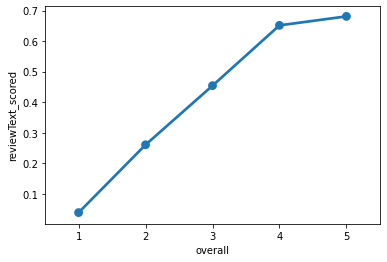

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pointplot(data = df, x = 'overall', y = 'reviewText_scored')

<AxesSubplot:xlabel='overall', ylabel='reviewText_scored'>

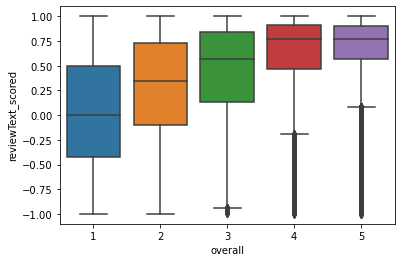

In [ ]:
sns.boxplot(data = df, x = 'overall', y = 'reviewText_scored')